In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image

In [8]:
def thresholding(pixel, threshold = 2.5):
    gray = (pixel[0]+pixel[1]+pixel[2])*pixel[3]
    return 0 if gray < threshold else 1

def getABlack(circuit):
    px = 0
    while circuit[px//circuit.shape[0]][px%circuit.shape[1]] == 1:
        px += 1
    return (px//circuit.shape[0], px%circuit.shape[1])
    
def count_blk_around(img, x, y):
    around = 8
    for a in range(-1,2):
        for b in range(-1,2):
            x2 = x+a
            y2 = y+b
            if(not (a == 0 and b == 0) and x2>=0 and y2 >= 0 and x2<=circuit.shape[1]-1 and y2<=circuit.shape[0]-1):
                around -= img[y2][x2]
    return around
    # return 8 - (img[y+1][x+1] + img[y+1][x] + img[y+1][x-1] + img[y][x-1] + img[y][x+1] + img[y-1][x-1] + img[y-1][x] + img[y-1][y+1])

def appendToTrack(circuit, x, y, track):
    tck = []
    for a in range(-1,2):
            for b in range(-1,2):
                x2 = x+a
                y2 = y+b
                if(not (a == 0 and b == 0) and x2>=0 and y2>=0 and x2<=circuit.shape[1]-1 and y2<=circuit.shape[0]-1):
                    count = count_blk_around(circuit, x2, y2)
                    already_in_track = (x2,y2) in track
                    is_black = int(circuit[y2][x2]) == 0
                    # print(is_black, not already_in_track,count, x2,y2)
                    if(not already_in_track and is_black and count > 3 and count < 8):
                        tck.append((x2,y2))
    return tck

def resize(track, circuit, new_shape=(720,1080), offset= (0,0)):
    track_recized = []
    factor = min(new_shape[0] / circuit.shape[0], new_shape[1] / circuit.shape[1])
    for t in track:
        track_recized.append((math.floor(t[0]*factor +offset[0]), math.floor(t[1]*factor + offset[1])))
    return track_recized

def reverse(track):
    return [track[i] for i in range(len(track)-1, -1, -1)]

def quantify(track, step):
    quantified = [ (p[0] - p[0]%step, p[1] - p[1]%step) for p in track]
    quantified_unique = []
    for q in quantified:
        if q not in quantified_unique:
            quantified_unique.append(q)
    return quantified_unique

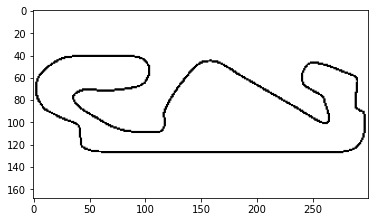

[(27, 42), (28, 42), (29, 41), (29, 42)]
1999


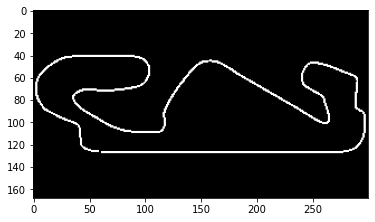

In [9]:
circuit_img = plt.imread('catalogne.png')
# print(circuit_img.shape)
circuit = np.array([[thresholding(px, threshold=1.93) for px in line]for line in circuit_img])
plt.imshow(circuit, cmap="gray")
plt.show()
# plt.imshow(circuit_img)
# plt.show()

track = []
y, x = getABlack(circuit)
# a = 10
# print(x,y)
# print(circuit[y][x+1])
# re = circuit[max(y-a,0):y+a,x-a:x+a]
# plt.imshow(re, cmap="gray")
track.append((x,y))
tck = appendToTrack(circuit, x,y, track)
print(tck)
while len(tck) > 0:
    x,y = tck.pop()
    tmp_tck = appendToTrack(circuit,x,y, track)
    for t in tmp_tck:
        if(t not in tck): tck.append(t)
    track.append((x,y))
    # print('\r', len(tck), len(track), end="")
print(len(track))

circ = np.zeros_like(circuit)
for p in track:
    circ[p[1]][p[0]] = 1
plt.imshow(circ, cmap="gray")
plt.show()

In [10]:
small_track = []
for i in range(len(track)):
    if(i%20 == 0): small_track.append(track[i])
print(len(small_track))

100


In [11]:
small_track_ordered = [small_track.pop()]
while len(small_track) > 0:
    p = small_track_ordered[-1]
    neighbor = 0
    mini = math.sqrt((small_track[neighbor][0]-p[0])**2 + (small_track[neighbor][1]-p[1])**2)
    for i in range(1,len(small_track)):
        n = small_track[i]
        dist = math.sqrt((n[0]-p[0])**2 + (n[1]-p[1])**2)
        if(dist < mini): 
            mini = dist
            neighbor = i
    small_track_ordered.append(small_track.pop(neighbor))

In [12]:
final_track = reverse(resize(small_track_ordered, circuit, (720,980), (20,20)))

quantify_final_track = quantify(final_track, 10)


print(tuple(quantify_final_track))

((100, 160), (110, 150), (170, 150), (240, 150), (300, 150), (350, 180), (350, 190), (340, 220), (310, 240), (280, 240), (240, 250), (210, 250), (180, 250), (150, 250), (140, 280), (140, 290), (190, 320), (200, 330), (230, 340), (270, 360), (290, 360), (330, 370), (350, 370), (390, 360), (400, 340), (410, 300), (410, 280), (440, 240), (450, 230), (470, 200), (500, 170), (510, 170), (560, 170), (570, 180), (610, 190), (640, 210), (660, 220), (700, 250), (750, 280), (770, 290), (800, 310), (830, 330), (840, 330), (880, 320), (850, 260), (850, 250), (810, 230), (800, 210), (820, 180), (840, 170), (880, 180), (900, 180), (950, 200), (960, 260), (960, 270), (980, 310), (990, 330), (980, 370), (980, 390), (950, 420), (920, 430), (880, 430), (850, 430), (820, 430), (790, 430), (750, 430), (720, 430), (680, 430), (660, 430), (620, 430), (590, 430), (550, 430), (520, 430), (490, 430), (460, 430), (420, 430), (390, 430), (360, 430), (330, 430), (290, 430), (260, 430), (230, 430), (180, 420), (17

In [13]:
# def resize(circuit, height=720, width=1220):
#     circuit_resized = np.ones((height, width))
#     factor = min(height / circuit.shape[0], width / circuit.shape[1])
#     for y in range(circuit.shape[0] -1):
#         for x in range(circuit.shape[1] -1):
#             if(circuit[y][x] == 0):
#                 circuit_resized[math.floor(y*factor) - 10][math.floor(x*factor) -10] = 0
#     return circuit_resized

# -------------------------









In [14]:
def remove_black_near_white(circuit): # , minBlkNeighB, maxBlkNeighB
    for y in range(circuit.shape[0] - 1):
        for x in range(circuit.shape[1] -1):
            if(circuit[y][x] == 0):
                nbOfBlackNeighBors = count_blk_around(circuit, x, y)
                print(nbOfBlackNeighBors)
                # nbOfBlackNeighBors = 8 - (circuit[y+1][x+1] + circuit[y+1][x] + circuit[y+1][x-1] + circuit[y][x-1] + circuit[y][x+1] + circuit[y-1][x-1] + circuit[y-1][x] + circuit[y-1][y+1])
                # are_left_white = (circuit[y+1][x-1] + circuit[y][x-1] + circuit[y-1][x-1]) == 3
                # are_right_white = (circuit[y+1][x+1] + circuit[y][x+1] + circuit[y-1][x+1]) == 3
                # are_top_white = (circuit[y+1][x+1] + circuit[y+1][x] + circuit[y+1][x-1]) == 3
                # are_bottom_white = (circuit[y-1][x-1] + circuit[y-1][x] + circuit[y-1][y+1]) == 3
                # if((are_left_white or are_right_white or are_bottom_white or are_top_white) and nbOfBlackNeighBors > 3):
                # if(nbOfBlackNeighBors > minBlkNeighB and nbOfBlackNeighBors < maxBlkNeighB):
                    # circuit[y][x] = 1

                blks = []
                if(circuit[y+1][x+1] == 0): blks.append({"y":y+1, "x":x+1})
                if(circuit[y+1][x] == 0): blks.append({"y":y+1, "x":x})
                if(circuit[y+1][x-1] == 0): blks.append({"y":y+1, "x":x-1})

                if(circuit[y-1][x+1] == 0): blks.append({"y":y-1, "x":x+1})
                if(circuit[y-1][x] == 0): blks.append({"y":y-1, "x":x})
                if(circuit[y-1][x-1] == 0): blks.append({"y":y-1, "x":x-1})

                if(circuit[y][x+1] == 0): blks.append({"y":y, "x":x+1})
                if(circuit[y][x-1] == 0): blks.append({"y":y, "x":x-1})

                if(nbOfBlackNeighBors < 8 and nbOfBlackNeighBors > 2):
                    flag = True
                    for blk in blks:
                        print(blk)
                        neighBlack = count_blk_around(circuit, blk["x"], blk["y"]) 
                        print(neighBlack)
                        if(neighBlack < 3): flag = False
                    if(flag): circuit[y][x] = 1

                    return countBlackPixel(circuit)

def countBlackPixel(circuit):
    nb_black = 0
    for line in circuit:
        for px in line:
            nb_black = nb_black + (1 if px == 0 else 0)
    return nb_black

In [15]:
prev_count = countBlackPixel(circuit)
count = remove_black_near_white
while prev_count != count:
    prev_count = count
    count = remove_black_near_white(circuit)
    print('\r',count,end='')

4
{'y': 41, 'x': 36}
5
{'y': 41, 'x': 35}
5
{'y': 41, 'x': 34}
5
{'y': 40, 'x': 36}
5
 20034
{'y': 41, 'x': 37}
5
{'y': 41, 'x': 36}
4
{'y': 41, 'x': 35}
4
{'y': 40, 'x': 37}
5
 20024
{'y': 41, 'x': 38}
5
{'y': 41, 'x': 37}
4
{'y': 41, 'x': 36}
3
{'y': 40, 'x': 38}
5
 20014
{'y': 41, 'x': 39}
5
{'y': 41, 'x': 38}
4
{'y': 41, 'x': 37}
3
{'y': 40, 'x': 39}
5
 20004
{'y': 41, 'x': 40}
5
{'y': 41, 'x': 39}
4
{'y': 41, 'x': 38}
3
{'y': 40, 'x': 40}
5
 19994
{'y': 41, 'x': 41}
5
{'y': 41, 'x': 40}
4
{'y': 41, 'x': 39}
3
{'y': 40, 'x': 41}
5
 19984
{'y': 41, 'x': 42}
5
{'y': 41, 'x': 41}
4
{'y': 41, 'x': 40}
3
{'y': 40, 'x': 42}
5
 19974
{'y': 41, 'x': 43}
5
{'y': 41, 'x': 42}
4
{'y': 41, 'x': 41}
3
{'y': 40, 'x': 43}
5
 19964
{'y': 41, 'x': 44}
5
{'y': 41, 'x': 43}
4
{'y': 41, 'x': 42}
3
{'y': 40, 'x': 44}
5
 19954
{'y': 41, 'x': 45}
5
{'y': 41, 'x': 44}
4
{'y': 41, 'x': 43}
3
{'y': 40, 'x': 45}
5
 19944
{'y': 41, 'x': 46}
5
{'y': 41, 'x': 45}
4
{'y': 41, 'x': 44}
3
{'y': 40, 'x': 46}
5
 199

In [16]:
previous_nb_black = 0 
nb_black = countBlackPixel(circuit)

print(nb_black)

while nb_black != previous_nb_black:
    previous_nb_black = nb_black
    remove_black_near_white(circuit, 2, 8)
    nb_black = countBlackPixel(circuit)

remove_black_near_white(circuit, 2, 8)


print(nb_black)
# plt.imshow(circuit, cmap="gray")
# plt.show()
circuit_jpg = np.array([[px*255 for px in line] for line in circuit])
print(circuit_jpg.shape)
im = Image.fromarray(circuit_jpg)
im.convert('RGB').save("img.jpg")
im.show()

1941


TypeError: remove_black_near_white() takes 1 positional argument but 3 were given

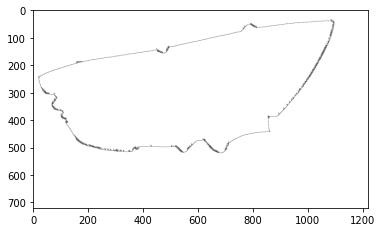

In [ ]:
circuit_resized = resize(circuit)
plt.imshow(circuit_resized, cmap="gray")
plt.show()

In [ ]:
track = []
# circuit_resized = resize(circuit)
y, x = getABlack(circuit)
track.append((x,y))
flag = True
while flag:
    x, y = track[-1]
    flag2 = True
    prev = len(track)
    for a in range(-1,2):
        for b in range(-1,2):
            if(not (a == 0 and b == 0) and flag2):
                count = count_blk_around(circuit, x+a, y+b)
                already_in_track = (x+a,y+b) in track
                is_black = int(circuit[y+a][x+b]) == 0
                # print("*"*20)
                # print(count)
                # print(circuit[y+a][x+b])
                # print(not already_in_track)
                if(not already_in_track and is_black and count > 3 and count < 8):
                    track.append((x+a,y+b))
                    # flag2 = False
    if(len(track) == prev): flag = False
    print('\r',len(track),end="")

 24

In [ ]:
x, y = track[-1]
print(count_blk_around(circuit, x, y))
for a in range(-1,2):
    for b in range(-1,2):
        if(not (a == 0 and b == 0)):
            count = count_blk_around(circuit, x+a, y+b)
            already_in_track = (x+a,y+b) in track
            is_black = int(circuit[y+a][x+b]) == 0
            print("*"*20)
            print(circuit[y+a][x+b], circuit[y+a][x+b] == 0)
            print(count, count > 3 and count < 8)
            print(not already_in_track)
            if(not already_in_track and is_black and count > 3 and count < 8):
                track.append((x+a,y+b))

4
********************
0 True
7 True
False
********************
0 True
4 True
False
********************
0 True
2 False
True
********************
0 True
7 True
False
********************
0 True
2 False
True
********************
1 False
7 True
True
********************
1 False
4 True
True
********************
1 False
2 False
True


[(1080, 32), (1080, 33), (1081, 33)]
(720, 1220)


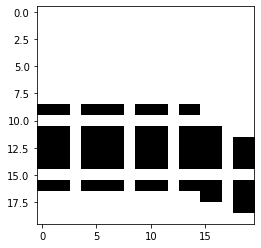

In [ ]:
print(track)
print(circuit_resized.shape)
a = 10
re = circuit_resized[max(33-a,0):33+a,1080-a:1080+a]
plt.imshow(re, cmap="gray")

In [ ]:
def getBlackNeighbors(circuit, pixel):
    blackNeighbors = []
    x = pixel[1]
    y = pixel[0]
    if(circuit[y+1][x-1]): blackNeighbors.append(circuit[y+1][x-1])
    if(circuit[y+1][x]): blackNeighbors.append(circuit[y+1][x])
    if(circuit[y+1][x+1]): blackNeighbors.append(circuit[y+1][x+1])

    if(circuit[y][x+1]): blackNeighbors.append(circuit[y][x+1])
    if(circuit[y][x-1]): blackNeighbors.append(circuit[y][x-1])

    if(circuit[y-1][x-1]): blackNeighbors.append(circuit[y-1][x-1])
    if(circuit[y-1][x]): blackNeighbors.append(circuit[y-1][x])
    if(circuit[y-1][x+1]): blackNeighbors.append(circuit[y-1][x+1])
    print(len(blackNeighbors))
    return blackNeighbors

In [ ]:
def getTrack(circuit):
    track_arr = []
    point = getABlack()
    


In [ ]:
track_coord = []
for y in range(circuit.shape[0] -1):
    for x in range(circuit.shape[1] -1):
        if(circuit[y][x] == 0):
            track_coord.append((x,y))

In [ ]:
keepOneOutOf = 3

c = 1
track = []
for coord in track_coord:
    if( c == keepOneOutOf):
        track.append(coord)
        c = 1
    else:
        c += 1

print(len(track))
track_tuple = tuple(track)
print(track_tuple)

1682
((845, 35), (851, 35), (848, 36), (847, 37), (853, 37), (825, 38), (828, 38), (831, 38), (834, 38), (837, 38), (840, 38), (843, 38), (846, 38), (849, 38), (855, 38), (808, 39), (811, 39), (814, 39), (817, 39), (820, 39), (823, 39), (848, 39), (851, 39), (792, 40), (795, 40), (798, 40), (801, 40), (804, 40), (848, 40), (851, 40), (779, 41), (782, 41), (785, 41), (788, 41), (791, 41), (851, 41), (768, 42), (771, 42), (774, 42), (777, 42), (851, 42), (854, 42), (757, 43), (760, 43), (763, 43), (766, 43), (852, 43), (855, 43), (742, 44), (745, 44), (748, 44), (751, 44), (754, 44), (852, 44), (855, 44), (621, 45), (733, 45), (736, 45), (739, 45), (852, 45), (855, 45), (620, 46), (722, 46), (725, 46), (728, 46), (731, 46), (619, 47), (622, 47), (715, 47), (718, 47), (721, 47), (853, 47), (621, 48), (624, 48), (709, 48), (712, 48), (715, 48), (854, 48), (613, 49), (616, 49), (619, 49), (622, 49), (625, 49), (700, 49), (703, 49), (706, 49), (709, 49), (852, 49), (855, 49), (611, 50), (622